In [1]:
import pickle

Pkl_Filename = "Pickle_RL_Model.pkl" 

with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer='char', ngram_range=(1, 8))),
                ('model', LogisticRegression(max_iter=300))])

In [2]:
import csv

with open('Asia-Pacific Conference on Communications.csv','r') as csvinput:
    with open('predict_Asia-Pacific Conference on Communications.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput, lineterminator='\n')
        reader = csv.reader(csvinput)
        
        row = next(reader)
        
        writer.writerow(['Name','Year','Gender'])
        
        for row in reader:
            name = row[0]
            year = row[1]
            gender = Pickled_LR_Model.predict([name])[0]
            writer.writerow([name,year,gender])

In [3]:
import pandas as pd

df = pd.read_csv('predict_Asia-Pacific Conference on Communications.csv')
print(df.shape)

(13522, 3)


In [4]:
# drop duplicate lines
df.drop_duplicates(subset=None, inplace=True)
print(df.shape)

(11253, 3)


In [5]:
df1 = df.groupby(['Year', 'Gender']).size().reset_index(name='Counts')

print(df1['Year'].tolist())


[1993, 1993, 1995, 1995, 1997, 1997, 1998, 1998, 1999, 1999, 2000, 2000, 2001, 2001, 2002, 2003, 2003, 2004, 2004, 2005, 2005, 2006, 2006, 2007, 2007, 2008, 2008, 2009, 2009, 2010, 2010, 2011, 2011, 2012, 2012, 2013, 2013, 2014, 2014, 2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019, 2021, 2021]


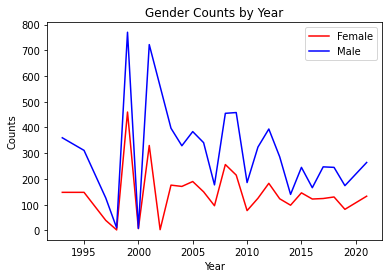

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# separate the data into two dataframes based on gender
df_female = df1[df1['Gender'] == 'F']
df_male = df1[df1['Gender'] == 'M']

# plot the data
plt.plot(df_female['Year'], df_female['Counts'], label='Female', color='red')
plt.plot(df_male['Year'], df_male['Counts'], label='Male', color='blue')

# add the title and labels
plt.title('Gender Counts by Year')
plt.xlabel('Year')
plt.ylabel('Counts')

# add the legend
plt.legend()

# show the plot
plt.show()
